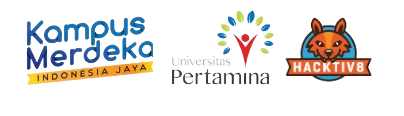

# FINAL PROJECT 2
## Logistic Regression dan SVM


#### Anggota Kelompok : 
1. Elizabeth Bella Ruth Septiana - PYTN-KS-008-016
2. Andreas Dimas Christanto      - PYTN-KS-008-017

## Rain In Australia 

Pada Final Project 2, Data diambil dari kaggle dengan link : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
- Collaborators : Joe Young ( Owner ), Adamyoung ( Editor )
- Peserta mengerjakan project menggunakan Jupyter Notebook dengan menggunakan model logistic regression. 

<p style='text-align: justify;'>
    Logistic regression memiliki cara kerja dengan memprediksi probabilitas sample termasuk dalama satu klasifikasi versus klasifikasi lainnya. Logistic regression merupakan tool yang hebat untuk digunakan untuk klasifikasi biner karena beroperasi pada probabilitas. Nilai ouput dalam logistic regression adalah klasifikasi bernomor dengan probablitas numerik dalam rentang 0 sampai 1 yang membulatkan nilai untuk klasifikasi dengan 0 adalah kelas negatif dan 1 adalah positif. 

<p style='text-align: justify;'>
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

<p style='text-align: justify;'>
RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.

###### Source & Acknowledgements
- Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
- An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

- Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
- Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

- Copyright Commonwealth of Australia 2010, Bureau of Meteorology.



# Overview 
Projects Overview
Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.

Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

# Objective
1. Memprediksi hujan 
2. Menentukan model terbaik untuk hujan di Australia 
3. Faktor Faktor yang mempengaruhi prediksi hujan

#  Import pustaka yang dibutuhkan

In [1]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# For ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# Style Text
bold = '\033[1m'
normal = '\033[0m'

# Data Loading 


In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [5]:
data.tail(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
print(data.shape)
print(" Data 'weatherAUS.csv' memiliki baris",bold,len(data),normal," dan kolom",bold,len(data.columns))

(145460, 23)
 Data 'weatherAUS.csv' memiliki baris  145460   dan kolom  23


### Missing Value


In [7]:
data2 = pd.DataFrame({"Missing_Value":data.isna().sum(), "Percent":data.apply(lambda x: f'{((x.isnull().sum()/data.shape[0])*100).round(2)} %')})
data2
# Belum Jelas 

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


<Figure size 432x288 with 0 Axes>

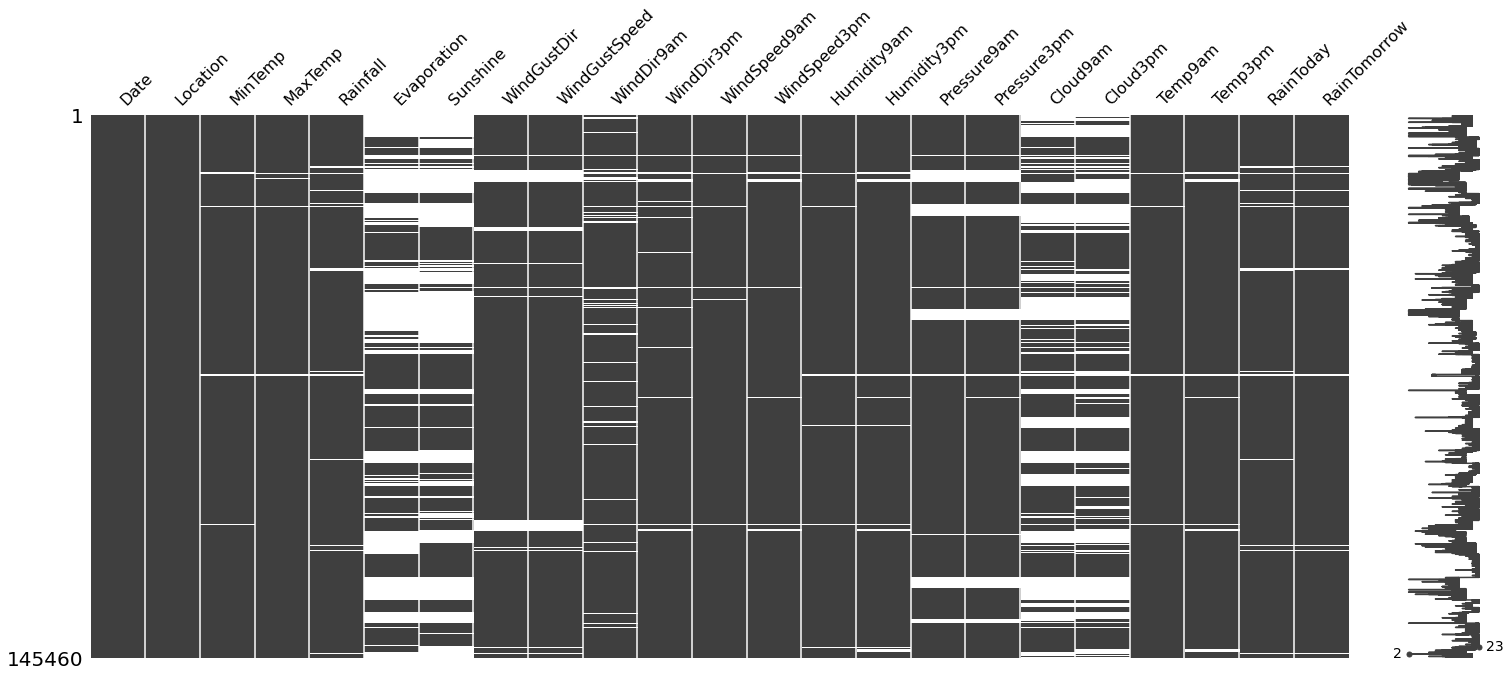

In [8]:
# Save Plot
plt.savefig("msno_matrix.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

msno.matrix(data);

Dari plot misingno (msno) diatas dan tabel mising value dapat dilihat seberapa banyak mising value yang terjadi 

### Describe Data 

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


dari data describe diatas kita dapat melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.

# Data Cleaning
##### Handling Missing Value 

In [10]:
data.dropna(subset=['RainToday','RainTomorrow'],inplace=True)
data.shape

(140787, 23)

Dapat kita lihat terdapat penurunan baris dari 145460 menjadi 140787, karena kita menghapus nilal Nan pada kolom RainToday dan RainTomorrow

In [11]:
data.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No


#### Delete Missing Value Data Above 35%

In [12]:
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)
data.shape

(140787, 19)

Dapat dilihat terdapat penurunan column dari 23 menjadi 19, hal ini dikarenakan kita mendrop column Evaporation,Sunshine,Cloud9am, dan Cloud3pm

### Copy DataFrame|

In [13]:
data_clean = data.copy()
data_clean.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No


Berdasarkan plot missing value pada kolom
- MinTemp	terdapat missing value (1485)atau 1.02 % dari data
- MaxTemp	1261 terdapat missing value	0.87 % dari data

Maka dari itu kita mengisi ke missingan tersebut menggunakan cara berikut 

In [14]:
# Fill MinTemp and MaxTemp by using mean
data_clean['MinTemp']=data_clean['MinTemp'].fillna(data_clean['MinTemp'].mean())
data_clean['MaxTemp']=data_clean['MaxTemp'].fillna(data_clean['MaxTemp'].mean())

# Fill Rainfall by using mean
data_clean['Rainfall']=data_clean['Rainfall'].fillna(data_clean['Rainfall'].mean())

# Fill WindGustSpeed by using mean
data_clean['WindGustSpeed']=data_clean['WindGustSpeed'].fillna(data_clean['WindGustSpeed'].mean())

# Fill WindSpeed9am and WindSpeed3pm by using mean
data_clean['WindSpeed9am']=data_clean['WindSpeed9am'].fillna(data_clean['WindSpeed9am'].mean())
data_clean['WindSpeed3pm']=data_clean['WindSpeed3pm'].fillna(data_clean['WindSpeed3pm'].mean())

# Fill Humidity9am and Humidity3pm by using mean
data_clean['Humidity9am']=data_clean['Humidity9am'].fillna(data_clean['Humidity9am'].mean())
data_clean['Humidity3pm']=data_clean['Humidity3pm'].fillna(data_clean['Humidity3pm'].mean())

# Fill Pressure9am and Pressure3pm by using mean
data_clean['Pressure9am']=data_clean['Pressure9am'].fillna(data_clean['Pressure9am'].mean())
data_clean['Pressure3pm']=data_clean['Pressure3pm'].fillna(data_clean['Pressure3pm'].mean())

# Fill Temp9am and Temp3pm by using mean
data_clean['Temp9am']=data_clean['Temp3pm'].fillna(data_clean['Temp9am'].mean())
data_clean['Temp3pm']=data_clean['Temp3pm'].fillna(data_clean['Temp3pm'].mean())

Setelah kita isi kekosongan ( mising value ) dari beberpa kolom tersebut kami mengecek missing value lagi dengan cara berikut 

In [15]:
data_clean.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

Teryata pada kolom WindGustDir , WindDir9am , WindDir3am mash terdapat mising value maka dari itu kami mendrop mising value tersebut dengan car a

In [16]:
#Menghapus missing value
data_clean.dropna(axis=0, inplace=True)
print("Cek Missing Value Lagi")
#Mengecek missing value
data_clean.isnull().sum()


Cek Missing Value Lagi


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Setelah dicek missing value telah diatasi.



In [17]:
data_clean['Date']
data_clean.shape

(123710, 19)

In [18]:
data_clean["Date"] = pd.to_datetime(data_clean["Date"])
data_clean['Day']=pd.DatetimeIndex(data_clean['Date']).day
data_clean['Month']=pd.DatetimeIndex(data_clean['Date']).month
data_clean['Year']=pd.DatetimeIndex(data_clean['Date']).year

In [19]:
data_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,21.8,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,24.3,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,23.2,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,26.5,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,29.7,29.7,No,No,5,12,2008


In [20]:
data_clean.shape

(123710, 22)

In [21]:
data_clean = data_clean.drop(columns="Date")
data_clean.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,21.8,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,24.3,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,23.2,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,26.5,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,29.7,29.7,No,No,5,12,2008


Dapat kita lihat bahwa ada penambahan 3 kolom. Kolom yang ditambahkan iyalah Day, Month, dan Year. Data kolom tersebut diambil dari kolom Date , penambahan kolom ini dipergunakan untuk mempermudah langkah langkah berikutnya.

Data Cleaning telah selesai 

# Data Exploration

In [22]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   WindGustDir    123710 non-null  object 
 5   WindGustSpeed  123710 non-null  float64
 6   WindDir9am     123710 non-null  object 
 7   WindDir3pm     123710 non-null  object 
 8   WindSpeed9am   123710 non-null  float64
 9   WindSpeed3pm   123710 non-null  float64
 10  Humidity9am    123710 non-null  float64
 11  Humidity3pm    123710 non-null  float64
 12  Pressure9am    123710 non-null  float64
 13  Pressure3pm    123710 non-null  float64
 14  Temp9am        123710 non-null  float64
 15  Temp3pm        123710 non-null  float64
 16  RainToday      123710 non-null  object 
 17  RainTomorrow   123710 non-nul

## Correlation 1

### Correlation 1 : Group all Columns that contain category data

#### Creating Categorical Column 

In [23]:
categ_col = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow",
    "Day",
    "Month",
    "Year"
]

data_categ = data_clean[categ_col]

data_categ.head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,W,W,WNW,No,No,1,12,2008
1,Albury,WNW,NNW,WSW,No,No,2,12,2008
2,Albury,WSW,W,WSW,No,No,3,12,2008
3,Albury,NE,SE,E,No,No,4,12,2008
4,Albury,W,ENE,NW,No,No,5,12,2008


### Correlation 1: Label Encode Data


In [24]:
Lenc = LabelEncoder()

data_categ["Location"] = Lenc.fit_transform(data_categ["Location"])
data_categ["WindGustDir"] = Lenc.fit_transform(data_categ["WindGustDir"])
data_categ["WindDir9am"] = Lenc.fit_transform(data_categ["WindDir9am"])
data_categ["WindDir3pm"] = Lenc.fit_transform(data_categ["WindDir3pm"])
data_categ["RainToday"] = Lenc.fit_transform(data_categ["RainToday"])
data_categ["RainTomorrow"] = Lenc.fit_transform(data_categ["RainTomorrow"])
data_categ["Day"] = Lenc.fit_transform(data_categ["Day"])
data_categ["Month"] = Lenc.fit_transform(data_categ["Month"])
data_categ["Year"] = Lenc.fit_transform(data_categ["Year"])
print(data_categ.head(5))
print('-'*100)
print(data_categ.tail(5))

   Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  \
0         1           13          13          14          0             0   
1         1           14           6          15          0             0   
2         1           15          13          15          0             0   
3         1            4           9           0          0             0   
4         1           13           1           7          0             0   

   Day  Month  Year  
0    0     11     1  
1    1     11     1  
2    2     11     1  
3    3     11     1  
4    4     11     1  
----------------------------------------------------------------------------------------------------
        Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  \
145454        39            0           2           0          0   
145455        39            0           9           1          0   
145456        39            6           9           3          0   
145457        39            3   

Correlation 1: Creating Data Correlation


In [25]:
corr_categ = data_categ.corr()
corr_categ

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.032922,-0.017452,0.020391,-0.002843,-0.001890,0.000473,-0.007448,0.031467
WindGustDir,0.032922,1.000000,0.408314,0.601815,0.135595,0.050900,-0.000090,0.046756,-0.006542
WindDir9am,-0.017452,0.408314,1.000000,0.319399,0.172744,0.031439,-0.005831,0.017667,0.000307
WindDir3pm,0.020391,0.601815,0.319399,1.000000,0.125807,0.027110,0.001253,0.034892,-0.005966
RainToday,-0.002843,0.135595,0.172744,0.125807,1.000000,0.315867,0.004062,0.007735,-0.012518
RainTomorrow,-0.001890,0.050900,0.031439,0.027110,0.315867,1.000000,0.005322,0.005723,-0.013528
Day,0.000473,-0.000090,-0.005831,0.001253,0.004062,0.005322,1.000000,0.014998,-0.005300
Month,-0.007448,0.046756,0.017667,0.034892,0.007735,0.005723,0.014998,1.000000,-0.117016
Year,0.031467,-0.006542,0.000307,-0.005966,-0.012518,-0.013528,-0.005300,-0.117016,1.000000


Data cor ini mirip heat map, kalau mendekati 1 hubungannya semakin kuat, dan sebaliknya

### Correlation 1: Data Visualization


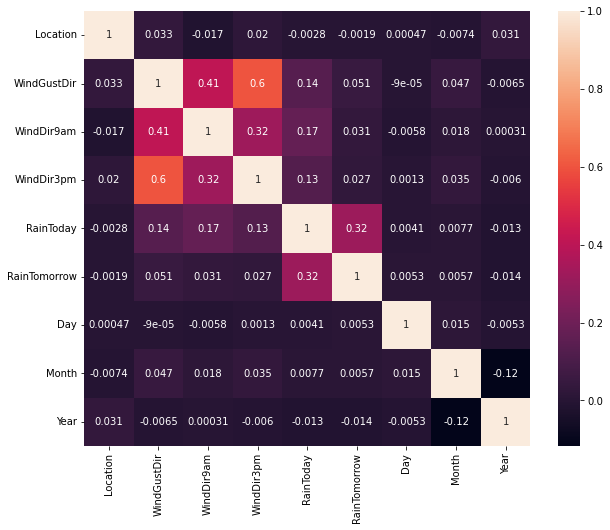

In [26]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_categ, annot=True)

# Save Plot
plt.savefig("corr_categ.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show();

### Drop Data

In [27]:
data_pred=data_clean.drop(columns=["WindDir9am","WindDir3pm"])
# Tidak perlu data tersebut karena data_pred untuk prediksi besok hujan atau tidak

### Explaining Data


In [28]:
data_categ.describe()


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,22.755242,7.727241,7.269259,7.773591,0.224363,0.221421,14.709781,5.431824,5.806111
std,13.616245,4.664946,4.551131,4.618254,0.417164,0.415205,8.788908,3.475113,2.528473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,3.000000,4.000000,0.000000,0.000000,7.000000,2.000000,4.000000
50%,23.000000,8.000000,7.000000,8.000000,0.000000,0.000000,15.000000,5.000000,6.000000
75%,34.000000,12.000000,11.000000,12.000000,0.000000,0.000000,22.000000,8.000000,8.000000
max,46.000000,15.000000,15.000000,15.000000,1.000000,1.000000,30.000000,11.000000,10.000000


## Data Inspection
## Linkage of Day and RainTomorrow data
### Linkage of Day and RainTomorrow data - No
 

In [29]:
no_tomm = pd.DataFrame(data_pred[(data_pred['RainTomorrow']=="No")].groupby('Day').count()['RainTomorrow'].sort_values(ascending=True))
no_tomm

,RainTomorrow
Day,
31,1871
30,2837
29,2903
28,3090
21,3096
22,3099
10,3122
3,3132
24,3132


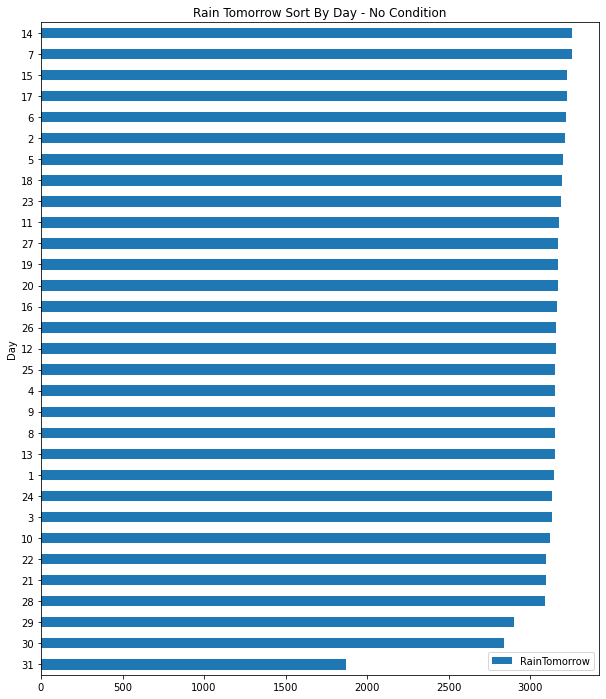

In [30]:
no_tomm.plot(kind="barh", title="Rain Tomorrow Sort By Day - No Condition", figsize=(10,12));

# Save Plot
plt.savefig("vis_day_rt_n.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### Linkage of Day and RainTomorrow data - Yes


In [31]:
yes_tomm = pd.DataFrame(data_pred[(data_pred['RainTomorrow']=="Yes")].groupby('Day').count()['RainTomorrow'].sort_values(ascending=True))
yes_tomm

,RainTomorrow
Day,
31,533
15,823
7,828
14,838
5,845
27,846
29,848
19,859
2,863


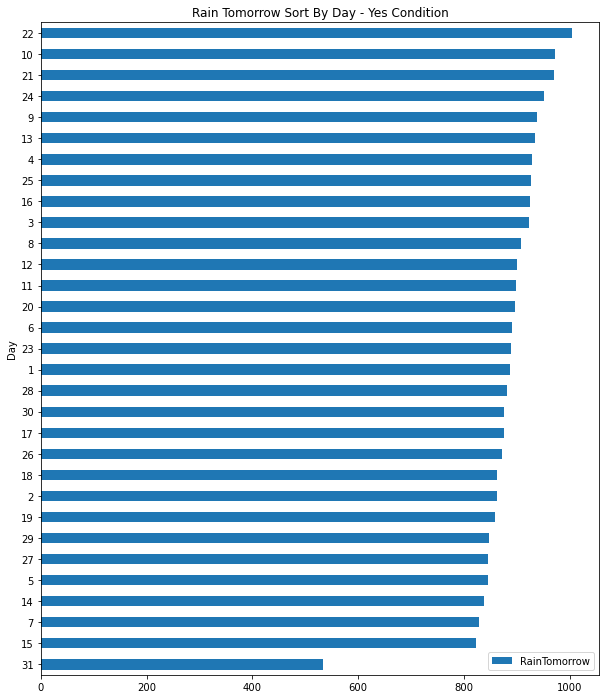

In [32]:
yes_tomm.plot(kind="barh", title="Rain Tomorrow Sort By Day - Yes Condition", figsize=(10,12));

# Save Plot
plt.savefig("vis_day_rt_y.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Correlation 2
#### Creating Numerical Column


In [33]:
 
numer_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "RainTomorrow"
]

data_numer = data_clean[numer_col]

data_numer.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No


## Correlation 2 : Visualization All Atribute


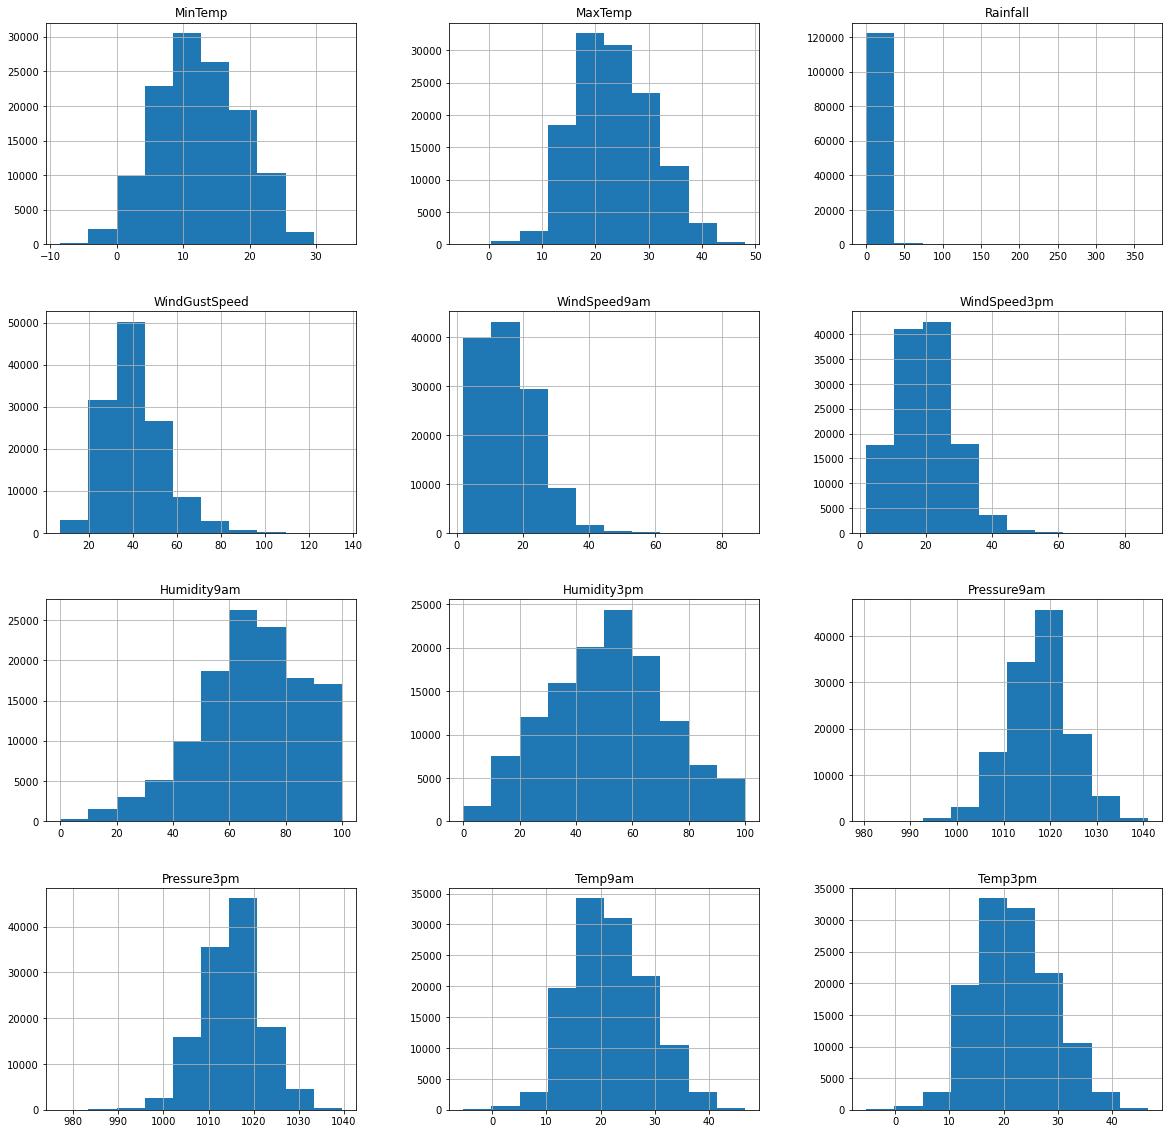

In [34]:
data_clean[numer_col].hist(bins=10, figsize = (20,20))

# Save Plot
plt.savefig("numer_col.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

### Correlation 2: Creating Data Correlation


In [35]:
corr_num = data_numer.corr()
corr_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738283,0.099872,0.141259,0.138219,0.153703,-0.216670,-0.000882,-0.415805,-0.431130,0.700887,0.706245
MaxTemp,0.738283,1.000000,-0.079862,0.037297,-0.015504,0.024165,-0.505134,-0.508545,-0.297541,-0.391772,0.968851,0.975000
Rainfall,0.099872,-0.079862,1.000000,0.131532,0.085619,0.060373,0.236880,0.258584,-0.164740,-0.124274,-0.084461,-0.083478
WindGustSpeed,0.141259,0.037297,0.131532,1.000000,0.591774,0.675796,-0.176426,-0.011814,-0.424451,-0.380524,0.003257,0.003189
WindSpeed9am,0.138219,-0.015504,0.085619,0.591774,1.000000,0.504546,-0.219122,-0.012809,-0.193749,-0.143782,-0.023684,-0.024687
WindSpeed3pm,0.153703,0.024165,0.060373,0.675796,0.504546,1.000000,-0.100647,0.043991,-0.271338,-0.232225,0.004361,0.002926
Humidity9am,-0.216670,-0.505134,0.236880,-0.176426,-0.219122,-0.100647,1.000000,0.678741,0.108827,0.159279,-0.498432,-0.499824
Humidity3pm,-0.000882,-0.508545,0.258584,-0.011814,-0.012809,0.043991,0.678741,1.000000,-0.033966,0.043456,-0.560441,-0.561195
Pressure9am,-0.415805,-0.297541,-0.164740,-0.424451,-0.193749,-0.271338,0.108827,-0.033966,1.000000,0.959545,-0.251580,-0.254417
Pressure3pm,-0.431130,-0.391772,-0.124274,-0.380524,-0.143782,-0.232225,0.159279,0.043456,0.959545,1.000000,-0.351112,-0.355199


Correlation 2: Data Visualization


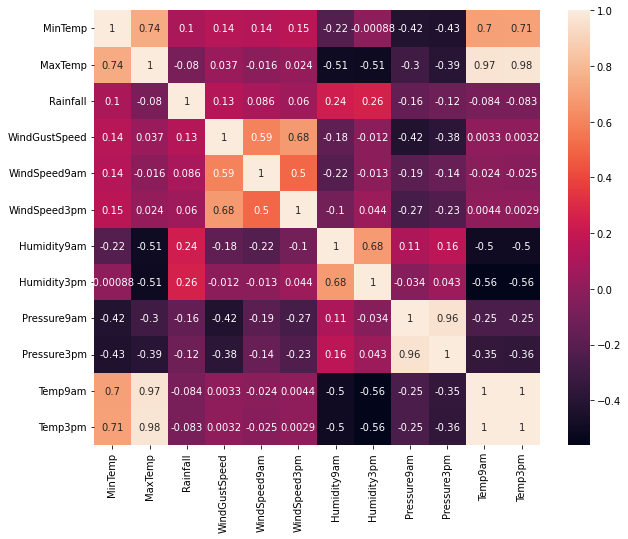

In [36]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_num, annot=True)
# Save Plot
plt.savefig("corr_heatmap_num.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show();

## Explain Data

In [37]:
corr_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738283,0.099872,0.141259,0.138219,0.153703,-0.216670,-0.000882,-0.415805,-0.431130,0.700887,0.706245
MaxTemp,0.738283,1.000000,-0.079862,0.037297,-0.015504,0.024165,-0.505134,-0.508545,-0.297541,-0.391772,0.968851,0.975000
Rainfall,0.099872,-0.079862,1.000000,0.131532,0.085619,0.060373,0.236880,0.258584,-0.164740,-0.124274,-0.084461,-0.083478
WindGustSpeed,0.141259,0.037297,0.131532,1.000000,0.591774,0.675796,-0.176426,-0.011814,-0.424451,-0.380524,0.003257,0.003189
WindSpeed9am,0.138219,-0.015504,0.085619,0.591774,1.000000,0.504546,-0.219122,-0.012809,-0.193749,-0.143782,-0.023684,-0.024687
WindSpeed3pm,0.153703,0.024165,0.060373,0.675796,0.504546,1.000000,-0.100647,0.043991,-0.271338,-0.232225,0.004361,0.002926
Humidity9am,-0.216670,-0.505134,0.236880,-0.176426,-0.219122,-0.100647,1.000000,0.678741,0.108827,0.159279,-0.498432,-0.499824
Humidity3pm,-0.000882,-0.508545,0.258584,-0.011814,-0.012809,0.043991,0.678741,1.000000,-0.033966,0.043456,-0.560441,-0.561195
Pressure9am,-0.415805,-0.297541,-0.164740,-0.424451,-0.193749,-0.271338,0.108827,-0.033966,1.000000,0.959545,-0.251580,-0.254417
Pressure3pm,-0.431130,-0.391772,-0.124274,-0.380524,-0.143782,-0.232225,0.159279,0.043456,0.959545,1.000000,-0.351112,-0.355199


## Inspection of data that has outlier values

In [ ]:
sns.pairplot(data_numer);

# Save Plot
plt.savefig("pairplot_numer.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Terlihat di (baris,kolom) atau n,n terdpat outlier, outlier ditandakan dengan adanya bercak biru pada beberapa titik n,n. Jadi bagaimana menghilangkan data outlier tersebut ? 

Kami menggunakan standarisasi pada data yang memiliki outlier

## Pengolahan Ourlier Data
### Melihat nilai upper limit dan lower limit 

In [ ]:
# Lower Limit
q1 = data_numer.quantile(0.25)
# Upper Limit
q3 = data_numer.quantile(0.75)

Iqr = q3-q1


In [ ]:
# Agar lebih rapi kita masukan dengan data frame 

In [ ]:
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":q3+1.5*Iqr})
# Lower Limit
low_limit = pd.DataFrame({"Lower Limit":q1-1.5*Iqr})

# apply into dataframe
data_quartile = pd.concat([up_limit, low_limit], axis=1)
data_quartile

## Visualisasi
### Temperature data visualization

In [ ]:
label=['Temp9am','Temp3pm','MaxTemp','MinTemp']
data2=[data_numer['Temp9am'],data_numer['Temp3pm'], data_numer['MaxTemp'],data_numer['MinTemp']]

sns.boxenplot(data=data2);
# Save Plot
plt.savefig("boxenplot_temperature.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.title('Temperature Boxenplot');
plt.legend(labels=label, loc=2,bbox_to_anchor=(1,1));

## Rainfall Tomorrow Prosentase

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "Hari besok Hujan"
data['RainTomorrow'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='Greens',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Hari besok Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
data.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='inferno'
)

# Save Plot
plt.savefig("rainfall_tomorrow.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

ax[1].set_title('Jumlah Data Hujan atau Tidak untuk label Hari besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')

## Rainfall and Humidity data visualization


In [ ]:
data_numer.plot(kind='scatter',x='Humidity3pm', y='Rainfall',
               figsize=(10,6))
plt.title('Humidity vs Rainfall')

# Save Plot
plt.savefig("scatter_numer.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Semakin tinggi humiditynya maka makin tinggi curah hujan nya 

## Re-group data


In [ ]:
re_group = ['MinTemp','MaxTemp','Temp9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am']

data_pred = data_pred.drop(columns=re_group)
data_pred.head(5)

# Data Preprocessing
#### Inspect Numeric Data
##### Location

In [ ]:
data_num_loc = pd.DataFrame(
    {
        "Location":data_pred["Location"].unique(),
        "location_num":data_categ["Location"].unique()
    }
).sort_values(by="location_num", ascending=True)

data_num_loc = data_num_loc.set_index(keys="location_num",drop=True)
data_num_loc

## WindGustDir

In [ ]:
data_num_wind = pd.DataFrame(
    {
        "WindGustDir":data_pred["WindGustDir"].unique(),
        "wind_gust_dir_num":data_categ["WindGustDir"].unique()
    }
).sort_values(by="wind_gust_dir_num", ascending=True)

data_num_wind = data_num_wind.set_index(keys="wind_gust_dir_num",drop=True)
data_num_wind

## Advance Data Preprocessing
## Replace category column with encode label

In [ ]:
data_pred['Location']=data_categ['Location']
data_pred['WindGustDir']=data_categ['WindGustDir']
data_pred['RainToday']=data_categ['RainToday']
data_pred['RainTomorrow']=data_categ['RainTomorrow']
data_pred.head(5)

# Model Definition - Part 1

Metode pengujian pada final Project 1 menggunakan metode Logistic Regrresion. Adapun pembandingnya seperti :
- Random Forest Classifier 
- Decision Tree Classifier
- Naive Bayes 
- K-Nearest Neighbors


In [ ]:
data_pred.head(1)

In [ ]:
# Except Raintomorrow  Variabel 
x = data_pred.drop(columns=['RainTomorrow'])
# Raintomorrow
y= data_pred['RainTomorrow']


In [ ]:
# Split ex_rain and rain x into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [ ]:
x_train

In [ ]:
#Standarisasi data
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train=scaler.fit_transform(x_train)

#x_test=scaler.fit_transform(x_test)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
#pip install fit_transform

# Model Training 

#### Create Model Logistic Regression

In [ ]:
lreg_model = LogisticRegression(penalty = 'l2', random_state=8)
# penalty = menentukan ukuran test 
# random_state pseudo-random generator argumen opsional x_train,x_test blblab

In [ ]:
#Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear')

In [ ]:
#Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

In [ ]:
#Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

In [ ]:
#Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [ ]:
#Membuat model Naive Bayes
gnb_model = GaussianNB()

# Evaluasi Model
## Logistic Regression
### Part 1

In [ ]:
#Model Training Logistic Regression
lreg_model = lreg_model.fit(x_train, y_train)
# kita mau pake ngefit ( milih ) x_train dan y_train 

In [ ]:
# Prediksi Probabilitasnya 
lreg_model.predict_proba(x_train)

In [ ]:
#Score dari data training
lreg_model.score(x_train,y_train)

In [ ]:
#Predict data
y_pred_lreg=lreg_model.predict(x_test)
y_pred_lreg

In [ ]:
#Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_lreg)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('actual 0', 'actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')
        
# Save Plot
plt.savefig("confusion_matrix_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

In [ ]:
#Accuracy Score
lreg_model.score(x_test,y_test)

In [ ]:
#Classification Report Logistic Regression Part 1
print(classification_report(y_test,y_pred_lreg))

In [ ]:
#Ringkasan Evaluasi Model Logistic Regression Part 1
print('Ringkasan Evaluasi Model Logistic Regression Part 1')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred_lreg),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred_lreg),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred_lreg),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred_lreg),4),normal)

In [ ]:
#melihat feature importance
importance=lreg_model.coef_[0]
sorted_index=np.argsort(importance)
labels=x.columns[sorted_index]
df_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
df_importance=df_importance.sort_values(by=['Feature Importance'], ascending=False)
df_importance

In [ ]:
#Removing features that have no effect
data_pred2 = data_pred.drop(columns=[
    "Day",
    "WindGustDir",
    "Pressure3pm",
    "Temp3pm",
    "Month",
    "Year"
])
data_pred2.head(2)

In [ ]:
#Model Definition - Part 2
x_2=data_pred2.drop(columns=['RainTomorrow'])
y_2=data_pred2['RainTomorrow']

x_train2, x_test2, y_train2,y_test2=train_test_split(x_2,y_2, test_size=0.3)

x_train2=scaler.fit_transform(x_train2)
x_test2=scaler.fit_transform(x_test2)

lreg_model_2 = LogisticRegression(penalty = 'l2', random_state = 8)
lreg_model_2.fit(x_train2,y_train2)

## Logistic Regression
### Part 2


In [ ]:
#Predict Probabilitas part 2
lreg_model_2.predict_proba(x_train2)

In [ ]:
#Score dari data training part 2
lreg_model_2.score(x_train2,y_train2)

In [ ]:
#Predict data part 2
y_pred_lreg_2=lreg_model_2.predict(x_test2)
y_pred_lreg_2

In [ ]:
#Testing model part 2
lreg_model_2.score(x_test2,y_test2)

In [ ]:
#Classification Report Logistic Regression Part 2
print(classification_report(y_test2,y_pred_lreg_2))

In [ ]:
#Ringkasan Evaluasi Model Logistic Regression Part 2
print('Ringkasan Evaluasi Model Logistic Regression Part 2')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_lreg_2),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_lreg_2),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_lreg_2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_lreg_2),4),normal)

In [ ]:
lg2 = confusion_matrix(y_test2, y_pred_lreg_2)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(lg2, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap="YlGnBu")
plt.xlabel('Y predict')
plt.ylabel('Y test')

# Save Plot
plt.savefig("confusion_matrix_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

## Support Vector Machine


In [ ]:
#Model Training Support Vector Machine
svm_model = svm_model.fit(x_train2, y_train2)

In [ ]:
#Predict data
y_pred_svm = svm_model.predict(x_test2)

In [ ]:
cm_svm = confusion_matrix(y_test2, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()
print(classification_report(y_test2, y_pred_svm))

In [ ]:
#Ringkasan Evaluasi Model Support Vector Machine
print('Ringkasan Evaluasi Model Support Vector Machine')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_svm),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_svm),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_svm),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_svm),4),normal)

## Model Evaluation - KNN

In [ ]:
# Train the model using the training sets
knn_model = knn_model.fit(x_train2, y_train2)

In [ ]:
# Predict the response for test dataset
y_pred_knn = knn_model.predict(x_test2)

In [ ]:
#Testing model
knn_model.score(x_test2,y_test2)

In [ ]:
#Classification Report K-Nearest Neighbors
print(classification_report(y_test2,y_pred_knn))

In [ ]:
cm_knn = confusion_matrix(y_test2, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("confusion_matrix_4.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [ ]:
#Ringkasan Evaluasi Model K-Nearest Neighbors
print('Ringkasan Evaluasi Model K-Nearest Neighbors')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_knn),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_knn),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_knn),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_knn),4),normal)

## Naive Bayes


In [ ]:
# Train the model using the training sets
gnb_model = gnb_model.fit(x_train2, y_train2)

In [ ]:
# Predict the response for test dataset
y_pred_gnb = gnb_model.predict(x_test2)

In [ ]:
#Classification Report Naive Bayes
print(classification_report(y_test2,y_pred_gnb))

In [ ]:
cm_nb = confusion_matrix(y_test2, y_pred_gnb)
sns.heatmap(cm_nb, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_5.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [ ]:
#Ringkasan Evaluasi Model Naive Bayes
print('Ringkasan Evaluasi Model Naive Bayes')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_gnb),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_gnb),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_gnb),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_gnb),4),normal)

## Decision Tree Classifier


In [ ]:
# Train the model using the training sets
dtc_model = dtc_model.fit(x_train2,y_train2)

In [ ]:
# Predict the response for test dataset
y_pred_dtc = dtc_model.predict(x_test2)

In [ ]:
#Classification Report Decition Tree Classifier
print(classification_report(y_test2,y_pred_dtc))

In [ ]:
cm_dct = confusion_matrix(y_test2, y_pred_dtc)
sns.heatmap(cm_dct, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("confusion_matrix_6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [ ]:
#Ringkasan Evaluasi Model Decision Tree Classifier
print('Ringkasan Evaluasi Model Decision Tree Classifier')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_dtc),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_dtc),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_dtc),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_dtc),4),normal)

## Random Forest Classifier


In [ ]:
# Train the model using the training sets
rfc_model = rfc_model.fit(x_train2,y_train2) 

In [ ]:
# Predict the response for test dataset
y_pred_rfc = rfc_model.predict(x_test2)

In [ ]:
#Classification Report Random Forest Classifier
print(classification_report(y_test2,y_pred_rfc))

In [ ]:
cm_rfc = confusion_matrix(y_test2, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_7.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [ ]:
#Ringkasan Evaluasi Model Random Forest Classifier
print('Ringkasan Evaluasi Model Random Forest Classifier')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_rfc),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_rfc),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_rfc),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_rfc),4),normal)

In [ ]:
data_pred2.info()


In [ ]:
data_pred2.head(5)


## Check Numeric of Prediction

### Location



In [ ]:
data_check_loc = pd.DataFrame(
    {
        "Location":data_pred2["Location"].unique(),
        "location_num":data_categ["Location"].unique()
    }
).sort_values(by="location_num", ascending=True)

data_check_loc = data_check_loc.set_index(keys="location_num",drop=True)
data_check_loc

## Rainfall


In [ ]:
data_check_rfall = pd.DataFrame(
    {
        "Rainfall":data_pred2["Rainfall"].unique(),
        "rainfall_num":data_pred2["Rainfall"].unique()
    }
).sort_values(by="rainfall_num", ascending=True)

data_check_rfall = data_check_rfall.set_index(keys="rainfall_num",drop=True)
data_check_rfall

## WindGustSpeed


In [ ]:
data_check_wdgst = pd.DataFrame(
    {
        "WindGustSpeed":data_pred2["WindGustSpeed"].unique(),
        "windgst_num":data_pred2["WindGustSpeed"].unique()
    }
).sort_values(by="windgst_num", ascending=True)

data_check_wdgst = data_check_wdgst.set_index(keys="windgst_num",drop=True)
data_check_wdgst

## Humidity3pm


In [ ]:
data_check_hum = pd.DataFrame(
    {
        "Humidity3pm":data_pred2["Humidity3pm"].unique(),
        "hum_num":data_pred2["Humidity3pm"].unique()
    }
).sort_values(by="hum_num", ascending=True)

data_check_hum = data_check_hum.set_index(keys="hum_num",drop=True)
data_check_hum

## RainToday

In [ ]:
data_check_rtd = pd.DataFrame(
    {
        "RainToday":data_pred2["RainToday"].unique(),
        "rtd_num":data_pred2["RainToday"].unique()
    }
).sort_values(by="rtd_num", ascending=True)

data_check_rtd = data_check_rtd.set_index(keys="rtd_num",drop=True)
data_check_rtd

## Cek RMSE Value


In [ ]:

# RMSE for Logistic Regression
rmse_lreg = mean_squared_error(y_test2, y_pred_lreg_2)
print("Value of Root Mean Square Error (Logistic Regression) = ", bold, round(rmse_lreg, 3))

In [ ]:
# RMSE for Support Vector Machine
rmse_svm = mean_squared_error(y_test2, y_pred_svm)
print("Value of Root Mean Square Error (Support Vector Machine (SVM)) =", bold, round(rmse_svm,3))


In [ ]:
# RMSE for K-Nearest Neighbors
rmse_knn = mean_squared_error(y_test2, y_pred_knn)
print("Value of Root Mean Square Error (K-Nearest Neighbors) =", bold, round(rmse_knn,3))


In [ ]:
# RMSE for Naive Bayes
rmse_gnb = mean_squared_error(y_test2, y_pred_gnb)
print("Value of Root Mean Square Error (Naive Bayes) =", bold, round(rmse_gnb,3))


In [ ]:
# RMSE for Decision Tree Classifier
rmse_dtc = mean_squared_error(y_test2, y_pred_dtc)
print("Value of Root Mean Square Error (Decision Tree Classifier) =", bold, round(rmse_dtc,3))


In [ ]:
# RMSE for Random Forest Classifier
rmse_rfc = mean_squared_error(y_test2, y_pred_rfc)
print("Value of Root Mean Square Error (Random Forest Classifier) =", bold, round(rmse_rfc,3))


# Model Inference


In [ ]:
model_infr = {
    "Location":[1, 2, 3, 4],
    "Rainfall":[0.0, 0.0, 0.0, 0.6],
    "WindGustSpeed":[44.0, 44.0, 46.0, 24.0],
    "Humidity3pm":[22.0, 25.0, 30.0, 16.0],
    "RainToday":[0, 0, 0, 1],
}

data_uji = pd.DataFrame(model_infr)
data_uji.head(5)

In [ ]:
sc = StandardScaler()
data_uji = sc.fit_transform(data_uji)

In [ ]:
pred1 = lreg_model_2.predict(data_uji)
pred2 = svm_model.predict(data_uji)
pred3 = knn_model.predict(data_uji)
pred4 = gnb_model.predict(data_uji)
pred5 = dtc_model.predict(data_uji)
pred6 = rfc_model.predict(data_uji)

print("Logistic Regression Model = ",pred1)
print("Support Virtual Machine Model = ",pred2)
print("KNN Model = ",pred3)
print("Naive Bayes = ",pred4)
print("Decision Tree = ",pred5)
print("Random Forest = ",pred6)

In [ ]:

pickle.dump(lreg_model_2, open('lreg_model.pkl','wb'))


In [ ]:
pickle.dump(svm_model, open('svm_model.pkl','wb'))

# Kesimpulan: 

Berdasarkan analisis yang telah dilakukan, maka dapat diambil kesimpulan sebagai berikut.

1. Berdasarkan parameter yang tersedia, terpilihlah 8 parameter yang mempengaruhi prediksi hujan, antara lain seperti:**location**, **rainfall**, **WindGustSpeed**, **Humidity3pm**, dan **RainToday**.
2. Dari 6 metode pengujian dengan masing-masing model yaitu **Logistic regression, SVM, KNN, Naive Bayes, Decision Tree Classifier, dan Random Forest Classifier** dengan masing-masing model memiliki nilai akurasi sebesar **83.78%,83.84%,83.75%,81,29%,83.09%,dan 82.16%.**
3. Model terbaik dengan best configuration untuk memprediksi hujan ialah model **Support Vector Machine (SVM)** karena memiliki nilai akurasi sebesar 83.75% dengan nilai RMSE yang kecil dibanding yang lain yaitu sebesar 0.162